# Correlation with Python

In this notebook we will go over an example of how to perform a correlation analysis.

As usual we start by importing the data.

In [4]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [5]:
X=pd.Series([2.1,2.5,3.6,4.0],name="Temp")
Y=pd.Series([8.0,10.0,12.0,14.0],name="Pressure")

Text(0.5, 0, 'Temperature')

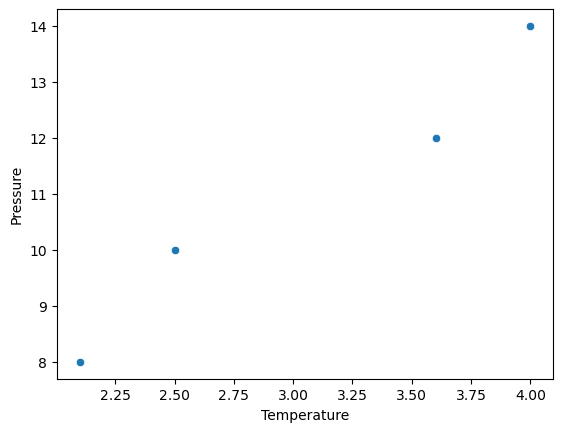

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X,y=Y)
plt.ylabel("Pressure")
plt.xlabel("Temperature")

In [7]:
#vector A is a 1 D matrix (4 Rows * 1 Column)
#vector B is a 1 D matrix

df=X.to_frame()
df

,Temp
0,2.1
1,2.5
2,3.6
3,4.0


In [8]:
meanX=np.mean(X)
meanY=np.mean(Y)
print(meanX)
print(meanY)

3.05
11.0


Variance is the sum of the squared deviations from the mean divided by n-1 for the sample

In [9]:
VarianceX=(np.square(2.1-3.1)+np.square(2.5-3.1)+np.square(3.6-3.1)+np.square(4.0-3.1))/(4-1)
VarianceY=(np.square(8.0-11)+np.square(10-11)+np.square(12-11)+np.square(14-11))/(4-1)
print(VarianceX)
print(VarianceY)

0.8066666666666666
6.666666666666667


Covariance is the sum of the cross-products divided by n-1 for the sample

Covariance is a measure of the direction and magnitude to quantify the relationship between two variables.

It measures the joint variability of two random variables. 

In [10]:
Covariance= ((2.1-3.05)*(8.0-11.0)+(2.5-3.05)*(10-11)+(3.6-3.05)*(12-11)+(4.0-3.05)*(14-11))/(4-1)
print(Covariance)

2.2666666666666666


In python the covariance matrix can be found using np.cov, where the variances are the main diagonal and the covariance is the other diagonal. 

The covariance matrix provides the covariance between the pairs of elements in the vectors of data.  

The units of measurement are X times Y. 

In [11]:
np.cov(X,Y)

array([[0.80333333, 2.26666667],
       [2.26666667, 6.66666667]])

Correlation (Pearson's correlation coefficient = r) is the scaled covariance, and defines the co-relationship between the two variables or how linearly related they are to each other. It is equal to the covariance divided by the product of the standard deviations. 

It is dimensionless.

It is always between -1 and +1

In [12]:
Pearsons_r= np.cov(X,Y) / (np.std(X,ddof=1)*(np.std(Y,ddof=1)))
print(Pearsons_r)

[[0.3471311  0.97945704]
 [0.97945704 2.88075601]]


In [13]:
# The correlation matrix provides the Pearson's r on the off-diagonal
# the correlation of a variable with itself is = 1

np.corrcoef(X,Y)

array([[1.        , 0.97945704],
       [0.97945704, 1.        ]])

Scipy will provide the Pearson's r, and will return the correaltion coefficient and the p-value for testing non-correaltion. The p-value (2-sided) indicates the probability of an uncorrelated system producing datasets that have a r at least as extreme as the one computed from the data. For 2 values, you can find the test statistic as:

t = r$\sqrt{(n-2)/(1-r^2)}$
with n-2 DOF

In [14]:
from scipy import stats
stats.pearsonr(X,Y)

PearsonRResult(statistic=0.9794570432566516, pvalue=0.020542956743348384)

In [15]:
t1=0.9795*np.sqrt((4-2)/(1-np.square(0.9795)))
print(t1)

6.876457364090153


In [16]:
stats.t.cdf(-6.8765,2)

0.01024987677730093

In [17]:
2*(stats.t.cdf(-6.8765,2))

0.02049975355460186

In [18]:
# correlation matrix with pandas

df['Pressure']=Y
df

,Temp,Pressure
0,2.1,8.0
1,2.5,10.0
2,3.6,12.0
3,4.0,14.0


In [19]:
correlation_matrix=df.corr()
correlation_matrix

,Temp,Pressure
Temp,1.000000,0.979457
Pressure,0.979457,1.000000


<AxesSubplot:>

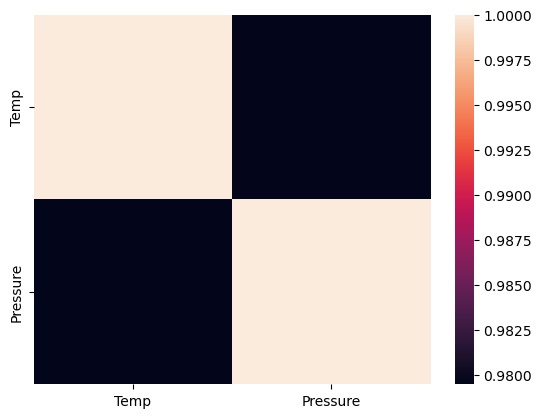

In [20]:
sns.heatmap(correlation_matrix)

# Spearman's correlation

For a non-normal distribution, the Spearman's correlation coefficient can be used to summarize the strength of the association between two variables.  You can use the Scipy stats call of spearmanr to compute this. A Spearmans correaltion of 1 results when there is a monotonic relationship between the variables, even if this relationship is not linear.  All data points with greater x values than that of a given point will have greater y values as well. The correaltion is applied to the rank varaibles.

In [21]:
stats.spearmanr(X,Y)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [22]:
print(X)

0    2.1
1    2.5
2    3.6
3    4.0
Name: Temp, dtype: float64


In [23]:
print(Y)

0     8.0
1    10.0
2    12.0
3    14.0
Name: Pressure, dtype: float64


Text(0.5, 36.72222222222221, 'Temperature')

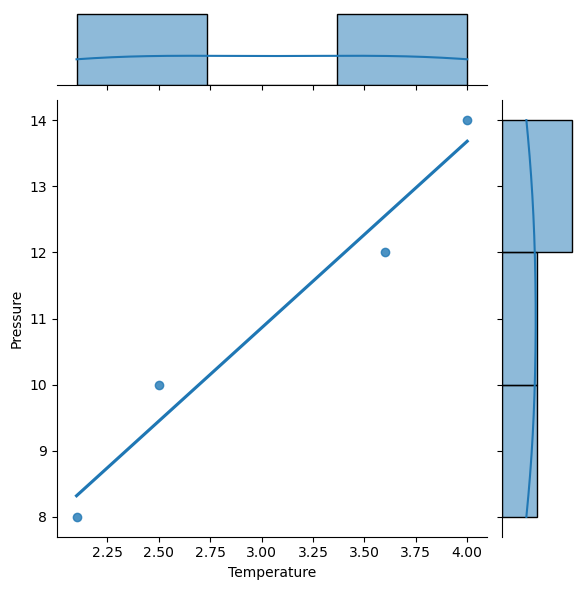

In [25]:
#regplot() plots data and a linear regression line or can use lmplot to help in conditioning on other variables
sns.jointplot(x=X,y=Y,kind="reg",ci=None)
plt.ylabel("Pressure")
plt.xlabel("Temperature")